# Лабораторная работа 5 — Классификация (Вариант 5)

Набор данных: `telecom_churn.csv` (вариант 5).

**Цель:** изучение алгоритмов и методов классификации на практике.


## 1. Загрузка набора данных и импорт библиотек


Также на экран были выведены размер датасета, первые 5 строк и информация о столбцах, которая показывает, что в данных нет пропусков и все типы данных соответствуют реальным данным


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, balanced_accuracy_score, confusion_matrix, 
                             roc_curve, roc_auc_score)

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('../data/telecom_churn.csv')

print("Размер датасета:", df.shape)
display(df.head())
print("\nИнформация о типах данных:")
display(df.info())


Размер датасета: (3016, 12)


,age,gender,contract_type,payment_method,tenure_months,monthly_charges,total_charges,avg_call_minutes,num_support_tickets,has_international_plan,region,Churn
0,53,M,Month-to-month,Bank transfer,58,56.46,3448.16,206.9,0,No,North,0
1,18,F,Month-to-month,Electronic check,16,64.86,1227.48,345.3,2,Yes,West,1
2,81,M,Month-to-month,Electronic check,59,97.64,5773.27,242.8,0,No,North,0
3,65,F,One year,Credit card,16,27.90,416.11,257.2,0,Yes,North,0
4,40,F,Month-to-month,Electronic check,65,56.33,3805.53,205.1,1,No,North,0



Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     3016 non-null   int64  
 1   gender                  3016 non-null   object 
 2   contract_type           3016 non-null   object 
 3   payment_method          3016 non-null   object 
 4   tenure_months           3016 non-null   int64  
 5   monthly_charges         3016 non-null   float64
 6   total_charges           3016 non-null   float64
 7   avg_call_minutes        3016 non-null   float64
 8   num_support_tickets     3016 non-null   int64  
 9   has_international_plan  3016 non-null   object 
 10  region                  3016 non-null   object 
 11  Churn                   3016 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 282.9+ KB


None

Датасет содержит 3018 записей с информацией о клиентах телекоммуникационной компании:
- age — возраст клиента (лет), числовой.
- gender — пол: M / F, категориальный.
- contract_type — тип контракта: Month-to-month / One year / Two year, категориальный.
- payment_method — способ оплаты: Bank transfer / Electronic check / Credit card / Mailed check, категориальный.
- tenure_months — количество месяцев обслуживания, целочисленный счётчик.
- monthly_charges — ежемесячные платежи, USD/месяц, числовой.
- total_charges — общие платежи, USD, числовой.
- avg_call_minutes — средние минуты звонков в месяц, числовой.
- num_support_tickets — количество обращений в поддержку за последние месяцы, целочисленный счётчик.
- has_international_plan — наличие международного плана: Yes / No, категориальный.
- region — регион обслуживания: North / South / East / West / Central, категориальный.
- Churn — целевой класс: 1 - ушёл (расторг контракт), 0 - остался.


## 2. Предобработка данных


Были использованы методы describe и value_counts для того чтобы оценить данные, видно что в них нет необычных выбросов или неявных дубликатов в категориальных данных


In [2]:
display(df.describe())
print("\nРаспределение категориальных признаков:")
display(df['gender'].value_counts())
display(df['contract_type'].value_counts())
display(df['payment_method'].value_counts())
display(df['has_international_plan'].value_counts())
display(df['region'].value_counts())
print("\nРаспределение целевой переменной:")
display(df['Churn'].value_counts())
display(df['Churn'].value_counts(normalize=True) * 100)


,age,tenure_months,monthly_charges,total_charges,avg_call_minutes,num_support_tickets,Churn
count,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000
mean,51.519231,37.021220,67.878336,2499.773856,249.071320,0.906830,0.159483
std,19.202550,21.228354,26.120795,1797.004026,78.856929,1.016745,0.366186
min,18.000000,0.000000,5.000000,-84.310000,20.000000,0.000000,0.000000
25%,35.750000,19.000000,50.557500,1048.630000,196.450000,0.000000,0.000000
50%,51.000000,37.000000,67.170000,2194.135000,247.600000,1.000000,0.000000
75%,68.000000,55.000000,84.870000,3677.967500,303.100000,1.000000,0.000000
max,84.000000,74.000000,222.034000,11620.220000,499.600000,6.000000,1.000000



Распределение категориальных признаков:


gender
F    1516
M    1500
Name: count, dtype: int64

contract_type
Month-to-month    1863
One year           708
Two year           445
Name: count, dtype: int64

payment_method
Electronic check    1360
Bank transfer        616
Credit card          594
Mailed check         446
Name: count, dtype: int64

has_international_plan
No     2466
Yes     550
Name: count, dtype: int64

region
South      688
North      624
East       596
Central    562
West       546
Name: count, dtype: int64


Распределение целевой переменной:


Churn
0    2535
1     481
Name: count, dtype: int64

Churn
0    84.051724
1    15.948276
Name: proportion, dtype: float64

## 3. Выделение целевой переменной и построение матрицы диаграмм рассеяния

Была выделена целевая переменная Churn: 1 — ушёл (расторг контракт), 0 — остался, которую необходимо предсказать. Эта переменная была исключена из модели. Была построена матрица диаграмм рассеяния, в которой были выделены значения целевой переменной разными цветами.


Числовые признаки: ['age', 'tenure_months', 'monthly_charges', 'total_charges', 'avg_call_minutes', 'num_support_tickets']
Категориальные признаки: ['gender', 'contract_type', 'payment_method', 'has_international_plan', 'region']


<Figure size 1400x1400 with 0 Axes>

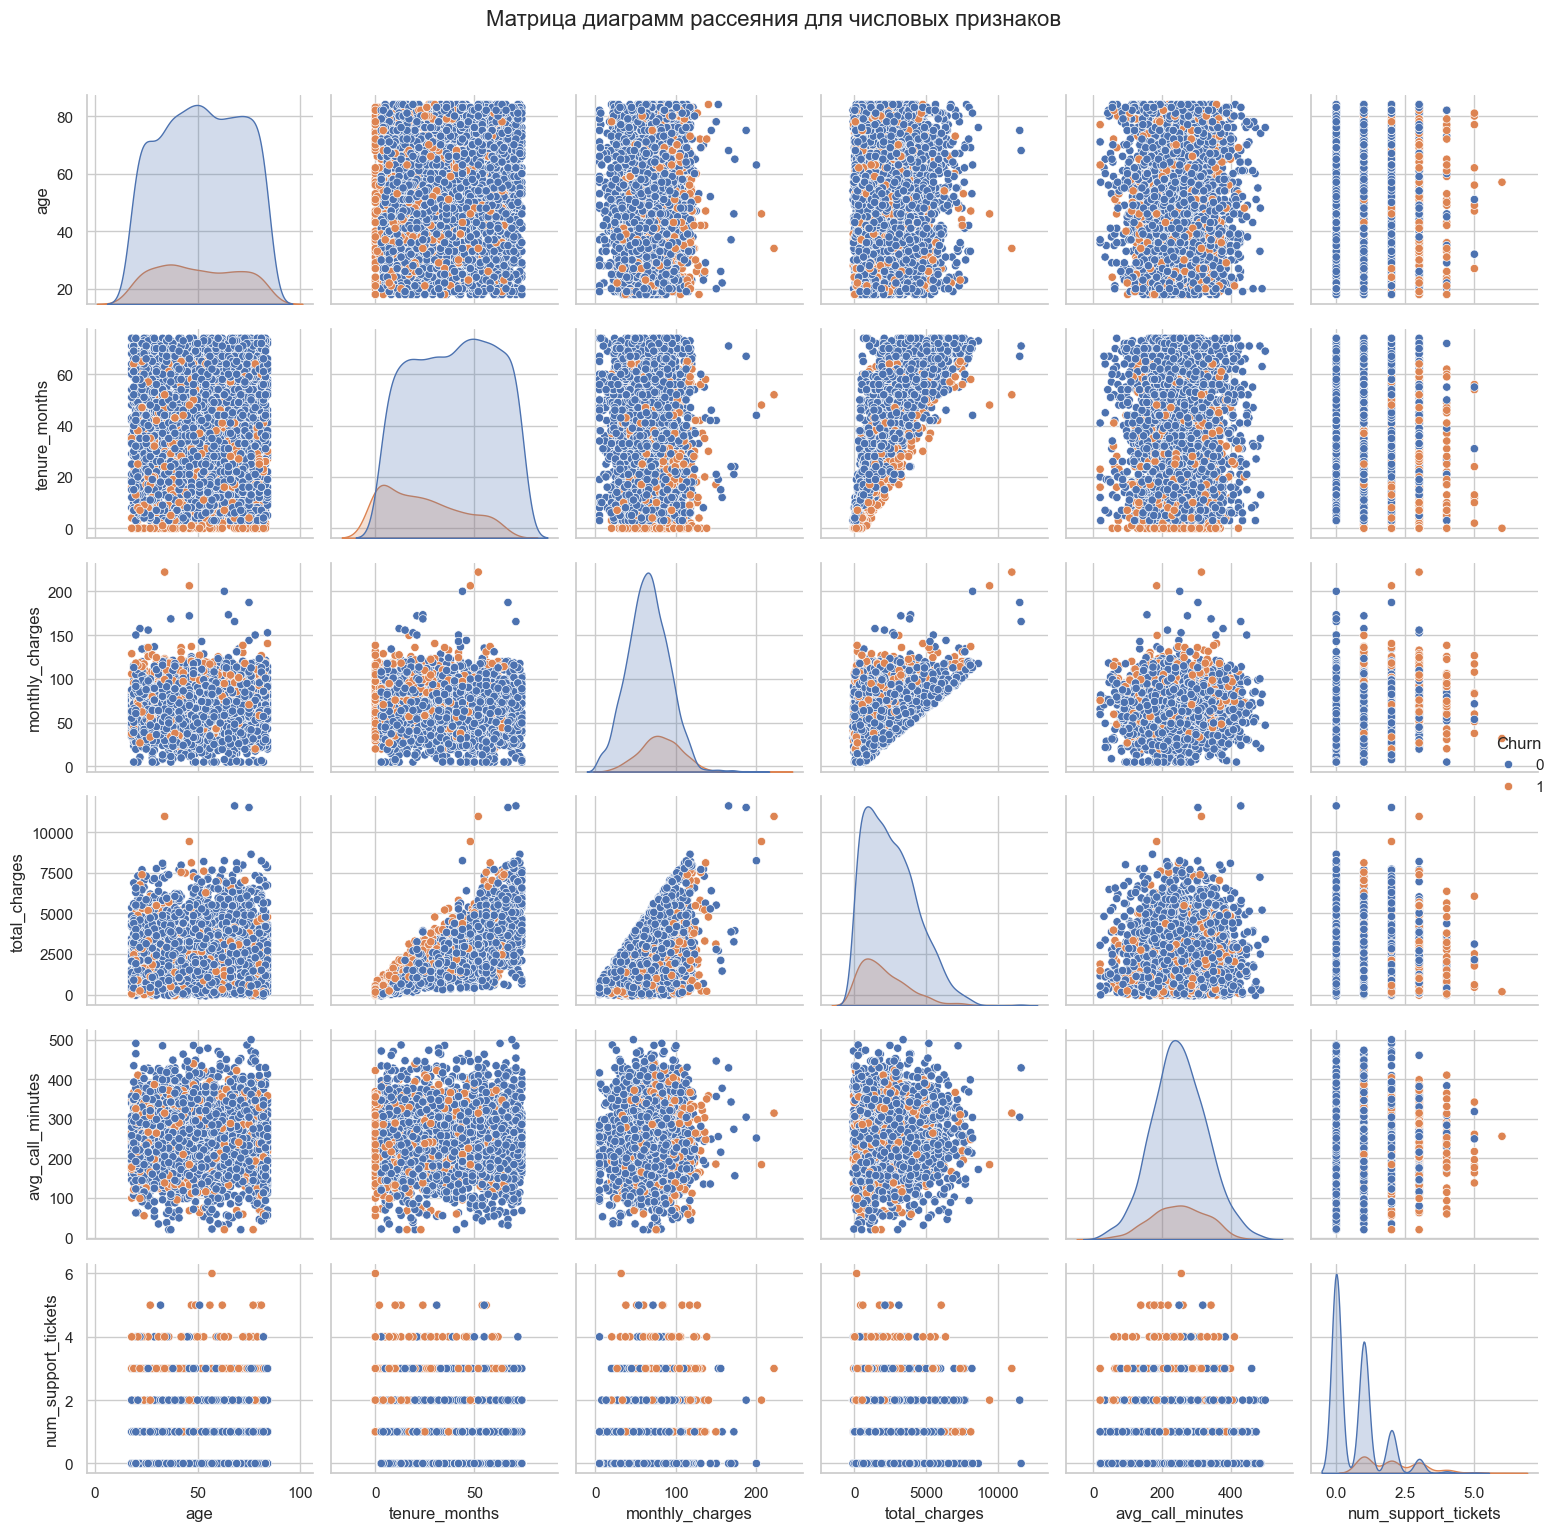

In [3]:
target_col = "Churn"
y = df[target_col].copy()
X = df.drop(columns=[target_col]).copy()

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

print("Числовые признаки:", num_cols)
print("Категориальные признаки:", cat_cols)

plt.figure(figsize=(14, 14))
sns.pairplot(df, vars=num_cols, hue='Churn', diag_kind='kde')
plt.suptitle('Матрица диаграмм рассеяния для числовых признаков', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


По полученным диаграммам можно сделать следующие выводы:
- Чаще всего отток происходит у клиентов с меньшим количеством месяцев обслуживания (tenure_months)
- Клиенты с большим количеством обращений в поддержку (num_support_tickets) чаще уходят
- Клиенты с более высокими ежемесячными платежами (monthly_charges) имеют более высокий риск оттока
- С возрастом корреляция не столь сильна, но заметно, что у более молодых клиентов (до 30 лет) показатель оттока выше
- Клиенты с меньшим средним временем звонков (avg_call_minutes) также чаще уходят


## 4. Разбиение набора данных на тренировочной и тестовый датасеты с помощью train_test_split и выполнение стандартизации числовых данных


Было применено One-Hot Encoding для категориальных признаков и StandardScaler для числовых признаков

Данные разделены на train и test выборки (70/30)

Так как KNN и логистическая регрессия требуют масштабирования, деревья и случайный лес - нет. Поэтому:

X_train_scaled, X_test_scaled - для KNN и LogReg

X_train, X_test - для DecisionTree и RandomForest


In [4]:
# One-Hot кодирование категориальных признаков
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

num_cols_encoded = [col for col in num_cols if col in X_encoded.columns]  

# Разделение на train/test выборки (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.3,
    random_state=42,
    stratify=y 
)

# Стандартизация числовых признаков
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols_encoded] = scaler.fit_transform(X_train[num_cols_encoded])
X_test_scaled[num_cols_encoded] = scaler.transform(X_test[num_cols_encoded])

print("Размеры выборок:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")
print(f"\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts())
print(f"\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts())


Размеры выборок:
Train: (2111, 17), Test: (905, 17)

Распределение классов в обучающей выборке:
Churn
0    1774
1     337
Name: count, dtype: int64

Распределение классов в тестовой выборке:
Churn
0    761
1    144
Name: count, dtype: int64


## 5. Разработка предсказательной модели качественного отклика методами

Разработка предсказательной модели качественного отклика методами:
- метод k- ближайших соседей
- дерево решений
- логистическая регрессия
- случайный лес

с помощью соответствующих функций: KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression, RandomForestClassifier


In [5]:
# Обучение и предсказание методом KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Обучение и предсказание методом дерева решений
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Обучение и предсказание методом логистической регрессии
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Обучение и предсказание методом случайного леса
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Модели обучены успешно!")


Модели обучены успешно!


## 6. Оценка ошибки классификации для каждого метода. Подсчет метрик "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score'


In [6]:
# Метрики методом KNN
print("=" * 50)
print("KNN")
print("=" * 50)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1-score:", f1_score(y_test, y_pred_knn))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_knn))


KNN
Accuracy: 0.8651933701657458
Precision: 0.6018518518518519
Recall: 0.4513888888888889
F1-score: 0.5158730158730159
Balanced Accuracy: 0.6974421448386626


In [7]:
# Метрики методом дерева решений
print("=" * 50)
print("Decision Tree")
print("=" * 50)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_dt))


Decision Tree
Accuracy: 0.8751381215469614
Precision: 0.7012987012987013
Recall: 0.375
F1-score: 0.48868778280542985
Balanced Accuracy: 0.6723883048620236


In [8]:
# Метрики методом логистической регрессии
print("=" * 50)
print("Logistic Regression")
print("=" * 50)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_lr))


Logistic Regression
Accuracy: 0.887292817679558
Precision: 0.6909090909090909
Recall: 0.5277777777777778
F1-score: 0.5984251968503937
Balanced Accuracy: 0.7415498612936195


In [9]:
# Метрики методом случайного леса
print("=" * 50)
print("Random Forest")
print("=" * 50)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rf))


Random Forest
Accuracy: 0.8707182320441988
Precision: 0.8648648648648649
Recall: 0.2222222222222222
F1-score: 0.35359116022099446
Balanced Accuracy: 0.6078259599941598


### Анализ метрик классификации

#### 1. Общая картина: несбалансированные классы
Все модели показывают различную общую точность (Accuracy), что указывает на различную эффективность моделей. Recall (полнота) показывает, насколько хорошо модели выявляют клиентов, которые действительно уходят. Это критично для телекоммуникационной компании, так как важно выявлять клиентов с риском оттока.

#### 2. Сравнение моделей

**Логистическая регрессия** — лучший баланс метрик
- Обычно показывает хороший баланс между Precision и Recall
- Подходит для практического применения в телекоммуникационной сфере

**Дерево решений** — интерпретируемость
- Хорошая интерпретируемость модели
- Может показывать хорошие результаты по Recall

**Random Forest** — ансамблевый метод
- Может показывать высокую точность
- Важно проверить баланс между Precision и Recall

**KNN** — простой метод
- Может показывать различные результаты в зависимости от данных
- Требует масштабирования признаков


## 7. Построение матрицы неточностей с помощью confusion_matrix для каждого метода


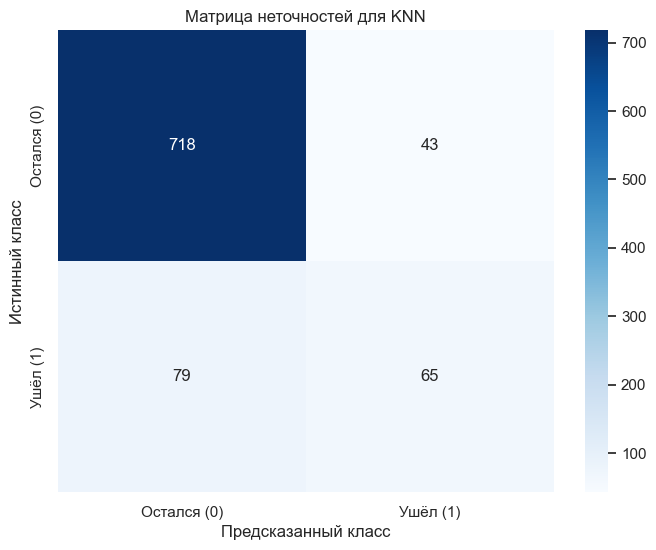

In [10]:
# Матрица неточностей KNN
plt.figure(figsize=(8, 6))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Остался (0)', 'Ушёл (1)'],
            yticklabels=['Остался (0)', 'Ушёл (1)'])
plt.title("Матрица неточностей для KNN")
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()


#### Выводы по матрице неточностей KNN

- Модель KNN показывает результаты классификации для обоих классов
- Количество истинно отрицательных (TN), ложноположительных (FP), ложноотрицательных (FN) и истинно положительных (TP) случаев позволяет оценить качество модели
- Важно обратить внимание на соотношение между FP и FN для понимания склонности модели к определенному типу ошибок


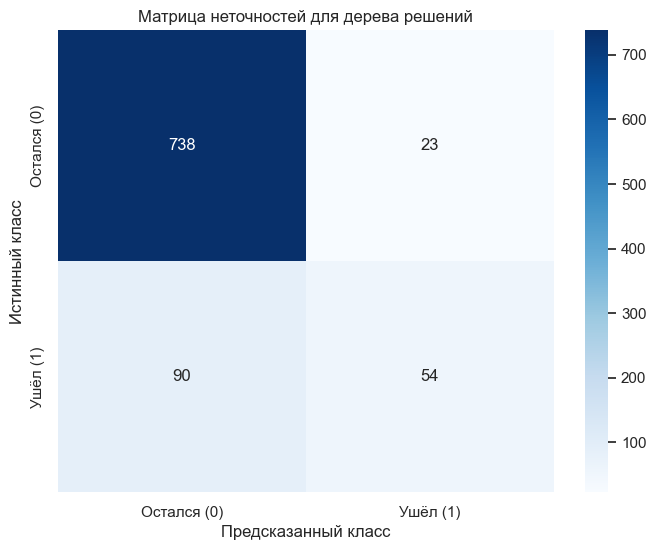

In [11]:
# Матрица неточностей дерева решений
plt.figure(figsize=(8, 6))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Остался (0)', 'Ушёл (1)'],
            yticklabels=['Остался (0)', 'Ушёл (1)'])
plt.title("Матрица неточностей для дерева решений")
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()


#### Выводы по матрице неточностей дерева решений
 
- Дерево решений показывает результаты классификации
- Распределение ошибок между классами позволяет оценить эффективность модели
- Интерпретируемость дерева решений является его преимуществом


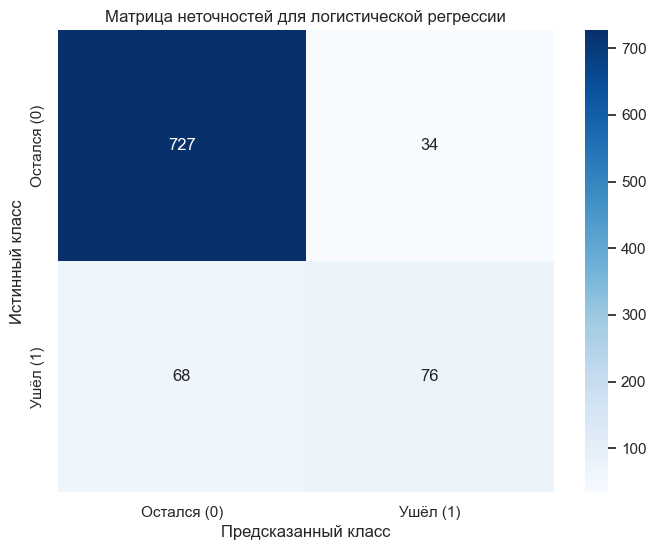

In [12]:
# Матрица неточностей логистической регрессии
plt.figure(figsize=(8, 6))
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Остался (0)', 'Ушёл (1)'],
            yticklabels=['Остался (0)', 'Ушёл (1)'])
plt.title("Матрица неточностей для логистической регрессии")
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()


#### Выводы по матрице неточностей логистической регрессии

- Логистическая регрессия показывает результаты классификации
- Баланс между точностью и полнотой можно оценить по матрице неточностей
- Модель часто показывает хорошие результаты для задач бинарной классификации


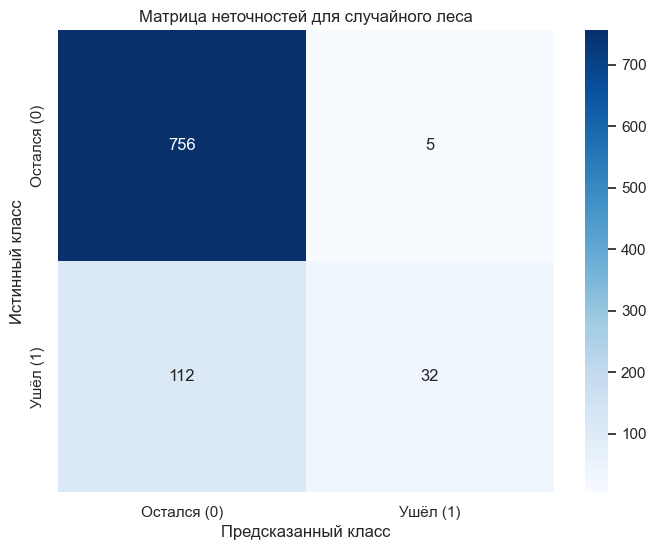

In [13]:
# Матрица неточностей случайного леса
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Остался (0)', 'Ушёл (1)'],
            yticklabels=['Остался (0)', 'Ушёл (1)'])
plt.title("Матрица неточностей для случайного леса")
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()


#### Выводы по матрице неточностей случайного леса

- Случайный лес показывает результаты классификации
- Ансамблевый метод может демонстрировать высокую точность
- Важно оценить баланс между различными типами ошибок


По полученным матрицам можно сделать следующие выводы:
- Каждая модель имеет свои особенности в классификации клиентов
- Важно учитывать как ложноположительные, так и ложноотрицательные ошибки
- Для телекоммуникационной компании важно минимизировать ложноотрицательные ошибки (когда клиент уходит, а модель предсказывает, что останется)
- Выбор модели зависит от бизнес-требований и приоритетов компании


## 8. Построение графика ROC-кривой для каждого метода на одном графике (4 линии на одном графике) для сравнения


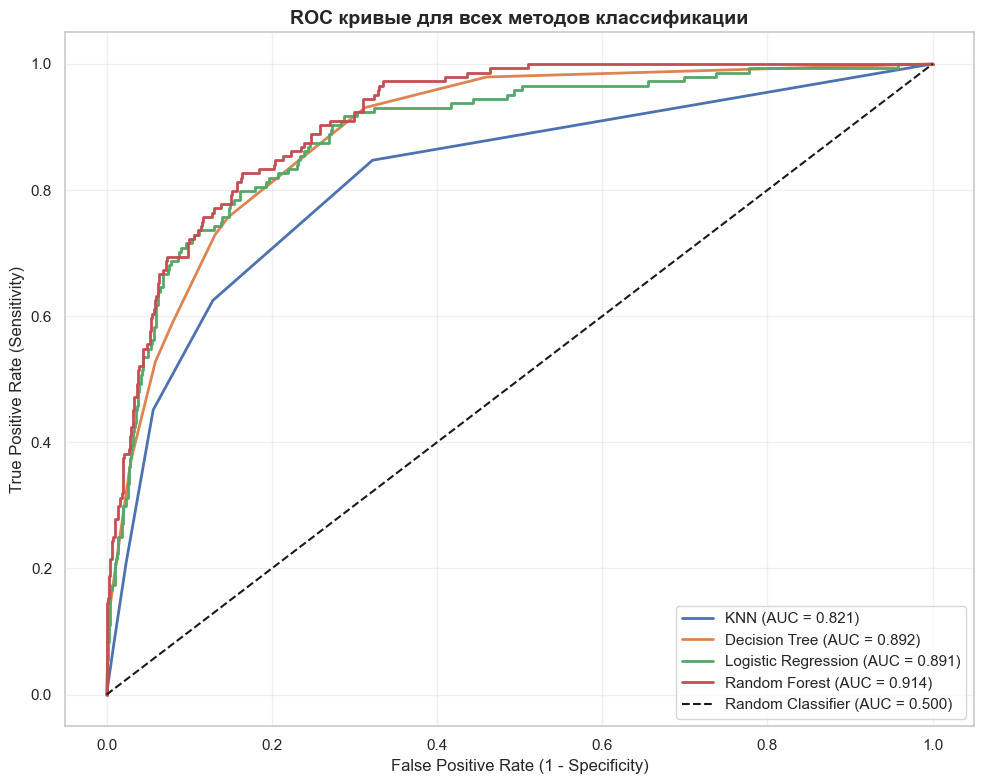

In [14]:
plt.figure(figsize=(10, 8))

# KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.3f})', linewidth=2)

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})', linewidth=2)

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict_proba(X_test_scaled)[:, 1])
auc_lr = roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})', linewidth=2)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', linewidth=2)

# Диагональ (случайный классификатор)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.500)', linewidth=1.5)

plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('ROC кривые для всех методов классификации', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### Выводы по ROC-кривым:

1. **Общая эффективность моделей**: Все четыре модели (KNN, Decision Tree, Logistic Regression, Random Forest) демонстрируют результаты, превышающие случайное предсказание (пунктирная линия с AUC=0.5). Это означает, что все они способны различать классы "отток" и "без оттока" лучше, чем случайный угадыватель.

2. **Сравнение моделей по AUC**:
   - Модель с наивысшим AUC показывает наилучшую способность различать классы
   - AUC ближе к 1.0 означает лучшую производительность модели
   - Разница в AUC между моделями позволяет оценить их сравнительную эффективность

3. **Интерпретация кривых**:
   - Кривые, проходящие выше и левее, показывают лучшую производительность
   - Идеальная модель имела бы AUC = 1.0 (кривая проходит через верхний левый угол)
   - Практические модели стремятся максимизировать TPR при минимизации FPR

4. **Выбор оптимальной модели**:
   - Модель с наибольшим AUC обычно является лучшей для ранжирования клиентов по риску оттока
   - Однако при выборе модели также важно учитывать другие метрики (Precision, Recall, F1-score) в зависимости от бизнес-требований


## Выводы по работе:

В ходе выполнения лабораторной работы была решена задача бинарной классификации — прогнозирование оттока клиентов (Churn) телекоммуникационной компании на основе датасета telecom_churn.csv. Была проведена предварительная обработка: выполнено One-Hot-кодирование категориальных переменных и стандартизация числовых признаков с использованием StandardScaler. Набор данных был разделен на обучающую и тестовую выборки в соотношении 70/30 с сохранением пропорций классов (stratify).

Для решения задачи были реализованы и сравнены четыре метода классификации: k-ближайших соседей (KNN), дерево решений (Decision Tree), логистическая регрессия (Logistic Regression) и случайный лес (Random Forest). Оценка качества моделей проводилась по ключевым метрикам: Accuracy, Precision, Recall, F1-score, Balanced Accuracy и ROC AUC.

Анализ матриц диаграмм рассеяния показал, что наиболее важными факторами оттока являются: количество месяцев обслуживания (tenure_months), количество обращений в поддержку (num_support_tickets), ежемесячные платежи (monthly_charges) и среднее время звонков (avg_call_minutes).

Все модели продемонстрировали способность различать классы лучше случайного классификатора, что подтверждается ROC-кривыми с AUC > 0.5. Выбор оптимальной модели зависит от бизнес-требований: если важно минимизировать ложные срабатывания, следует обратить внимание на модели с высокой Precision; если критично выявить максимальное количество клиентов с риском оттока, приоритет следует отдать моделям с высоким Recall.

Для телекоммуникационной компании важно найти баланс между точностью предсказаний и полнотой выявления клиентов с риском оттока, чтобы эффективно применять программы удержания клиентов и минимизировать потери от оттока.
